In [72]:
#Basic Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [73]:
df = pd.read_excel('Book2.xlsx')
df

,Id,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,3,ShareChat,Bengaluru,India,Asia,200,2023-12-20,15.0,1333,1133,Consumer,Series H,$1700,2023,12.97194,77.59369
1,4,InSightec,Haifa,Israel,Asia,100,2023-12-19,20.0,500,400,Healthcare,Unknown,$733,2023,32.81841,34.98850
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350,2023-12-18,10.0,3500,3150,Energy,Post-IPO,$116,2023,37.54827,-121.98857
3,7,Udaan,Bengaluru,India,Asia,100,2023-12-18,10.0,1000,900,Retail,Unknown,1500,2023,12.97194,77.59369
4,14,Cruise,San Francisco Bay Area,USA,North America,900,2023-12-14,24.0,3750,2850,Transportation,Acquired,$15000,2023,37.77493,-122.41942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,3286,Pitch,Berlin,Germany,Europe,80,2024-08-01,67.0,119,39,Other,Series B,$138,2024,52.52437,13.41053
1414,3287,BenchSci,Toronto,Canada,North America,70,2024-08-01,17.0,412,342,Healthcare,Series D,$164,2024,43.70643,-79.39864
1415,3288,NanoString Technology,Seattle,USA,North America,50,2024-08-01,9.0,556,506,Healthcare,Post-IPO,$826,2024,47.60621,-122.33207
1416,3289,Trigo,Tel Aviv,Israel,Asia,30,2024-04-01,15.0,200,170,Retail,Series C,$199,2024,32.08088,34.78057


In [74]:


# country, company, industry, location_HQ, company size


In [75]:
df.drop(["Id", "Date_layoffs","Money_Raised_in_$_mil","lat", "lng"],axis = 1,inplace=True)

In [76]:
df

,Company,Location_HQ,Country,Continent,Laid_Off,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Year
0,ShareChat,Bengaluru,India,Asia,200,15.0,1333,1133,Consumer,Series H,2023
1,InSightec,Haifa,Israel,Asia,100,20.0,500,400,Healthcare,Unknown,2023
2,Enphase Energy,San Francisco Bay Area,USA,North America,350,10.0,3500,3150,Energy,Post-IPO,2023
3,Udaan,Bengaluru,India,Asia,100,10.0,1000,900,Retail,Unknown,2023
4,Cruise,San Francisco Bay Area,USA,North America,900,24.0,3750,2850,Transportation,Acquired,2023
...,...,...,...,...,...,...,...,...,...,...,...
1413,Pitch,Berlin,Germany,Europe,80,67.0,119,39,Other,Series B,2024
1414,BenchSci,Toronto,Canada,North America,70,17.0,412,342,Healthcare,Series D,2024
1415,NanoString Technology,Seattle,USA,North America,50,9.0,556,506,Healthcare,Post-IPO,2024
1416,Trigo,Tel Aviv,Israel,Asia,30,15.0,200,170,Retail,Series C,2024


Preparing X and Y variables

In [77]:
X = df.drop(columns=['Laid_Off'],axis=1)

In [78]:
X.head()

,Company,Location_HQ,Country,Continent,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Year
0,ShareChat,Bengaluru,India,Asia,15.0,1333,1133,Consumer,Series H,2023
1,InSightec,Haifa,Israel,Asia,20.0,500,400,Healthcare,Unknown,2023
2,Enphase Energy,San Francisco Bay Area,USA,North America,10.0,3500,3150,Energy,Post-IPO,2023
3,Udaan,Bengaluru,India,Asia,10.0,1000,900,Retail,Unknown,2023
4,Cruise,San Francisco Bay Area,USA,North America,24.0,3750,2850,Transportation,Acquired,2023


In [79]:
Y = df['Laid_Off']

In [80]:
Y

0       200
1       100
2       350
3       100
4       900
       ... 
1413     80
1414     70
1415     50
1416     30
1417    200
Name: Laid_Off, Length: 1418, dtype: int64

In [81]:
num_features=X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(include="object").columns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OrdinalEncoder()

preprocessor = ColumnTransformer(
    [
        ("OrdinalEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features),
    ]
)

In [82]:
X = preprocessor.fit_transform(X)

In [83]:
X

array([[ 8.42000000e+02,  1.20000000e+01,  1.30000000e+01, ...,
        -9.89401514e-02, -9.85726053e-02,  9.77695603e-01],
       [ 4.71000000e+02,  4.70000000e+01,  1.60000000e+01, ...,
        -1.36011081e-01, -1.32088006e-01,  9.77695603e-01],
       [ 3.15000000e+02,  1.03000000e+02,  3.40000000e+01, ...,
        -2.50233182e-03, -6.34809982e-03,  9.77695603e-01],
       ...,
       [ 6.43000000e+02,  1.10000000e+02,  3.40000000e+01, ...,
        -1.33518917e-01, -1.27241304e-01,  1.84962791e+00],
       [ 9.78000000e+02,  1.20000000e+02,  1.60000000e+01, ...,
        -1.49361956e-01, -1.42604434e-01,  1.84962791e+00],
       [ 3.76000000e+02,  7.40000000e+01,  3.40000000e+01, ...,
        -1.49361956e-01, -1.50377446e-01,  1.84962791e+00]])

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)
X_train.shape,X_test.shape

((1134, 10), (284, 10))

Create an Evaluate Function to give all metrics after model Training

In [102]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_sq = r2_score(true, predicted)
    return mae, rmse, r2_sq


In [103]:
models = {"Linear Regression" : LinearRegression(), 
    "Lasso" : Lasso(), 
    "Ridge" : Ridge(), 
    "K-Neighbors Regressor" : KNeighborsRegressor(), 
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoosting Regressor" : CatBoostRegressor(verbose=False),
    "AdaBoost Regressor" : AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range (len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train) #train model

    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(Y_train, Y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(Y_test, Y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('model performance for training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print("--------------------------------------------------------")

    print('model performance for testing set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)


Linear Regression
model performance for training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
--------------------------------------------------------
model performance for testing set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
Lasso
model performance for training set
- Root Mean Squared Error: 355.3012
- Mean Absolute Error: 119.0571
- R2 Score: 0.8456
--------------------------------------------------------
model performance for testing set
- Root Mean Squared Error: 351.0928
- Mean Absolute Error: 118.8748
- R2 Score: 0.7865
Ridge
model performance for training set
- Root Mean Squared Error: 434.1116
- Mean Absolute Error: 145.1829
- R2 Score: 0.7695
--------------------------------------------------------
model performance for testing set
- Root Mean Squared Error: 428.2587
- Mean Absolute Error: 144.9284
- R2 Score: 0.6823
K-Neighbors Regressor
model performance for training set
- Root Mean Squared E

d:\tech_layoffs\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.657e+07, tolerance: 9.271e+04
  model = cd_fast.enet_coordinate_descent(


Random Forest Regressor
model performance for training set
- Root Mean Squared Error: 180.9335
- Mean Absolute Error: 26.6272
- R2 Score: 0.9600
--------------------------------------------------------
model performance for testing set
- Root Mean Squared Error: 274.5141
- Mean Absolute Error: 42.0181
- R2 Score: 0.8694
XGBRegressor
model performance for training set
- Root Mean Squared Error: 1.3139
- Mean Absolute Error: 0.9214
- R2 Score: 1.0000
--------------------------------------------------------
model performance for testing set
- Root Mean Squared Error: 340.0248
- Mean Absolute Error: 56.2793
- R2 Score: 0.7997
CatBoosting Regressor
model performance for training set
- Root Mean Squared Error: 9.5987
- Mean Absolute Error: 6.5059
- R2 Score: 0.9999
--------------------------------------------------------
model performance for testing set
- Root Mean Squared Error: 257.8608
- Mean Absolute Error: 50.2901
- R2 Score: 0.8848
AdaBoost Regressor
model performance for training set

In [106]:
pd.DataFrame(list(zip(model_list, r2_list)),columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,1.000000
4,Decision Tree,0.961917
7,CatBoosting Regressor,0.884809
5,Random Forest Regressor,0.869449
6,XGBRegressor,0.799705
1,Lasso,0.786453
2,Ridge,0.682267
8,AdaBoost Regressor,0.666329
3,K-Neighbors Regressor,0.199569


Linear Regression

In [107]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, Y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(Y_test, y_pred)*100
print("accuracy of the model is %.2f" %score)

accuracy of the model is 100.00


Text(0, 0.5, 'Predicted')

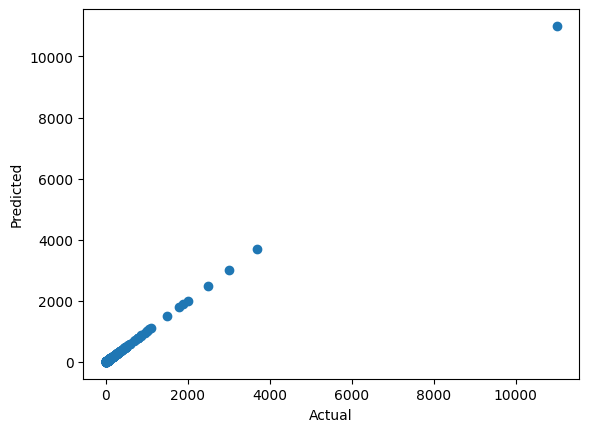

In [108]:
plt.scatter(Y_test, y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted')

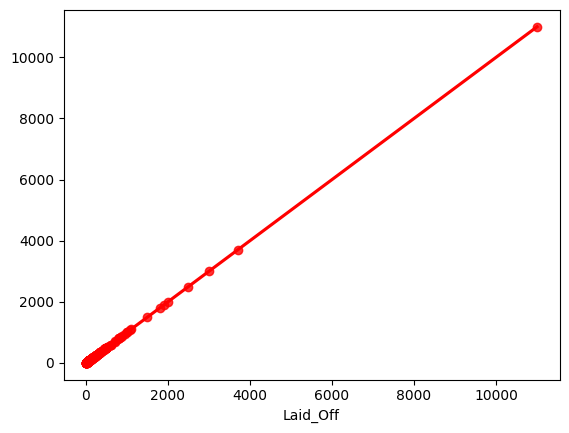

In [109]:
sns.regplot(x = Y_test, y = y_pred, ci=None, color = 'red');

difference between actual and predicted values

In [111]:
pred_df = pd.DataFrame({"Actaul Vlaue" : Y_test, "Predicted Value" : y_pred, "Difference" : Y_test - y_pred})
pred_df

,Actaul Vlaue,Predicted Value,Difference
51,150,150.0,-3.842615e-11
481,30,30.0,-7.025847e-11
806,23,23.0,2.341949e-11
1261,20,20.0,2.046363e-12
297,209,209.0,-1.159606e-11
...,...,...,...
350,100,100.0,6.116352e-11
724,55,55.0,-6.298251e-11
894,27,27.0,8.412826e-12
289,475,475.0,3.160494e-11
